<a href="https://colab.research.google.com/github/airctic/icevision/blob/master/notebooks/getting_started_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection using IceVision
by : Hamka Satria

## 0. Settings

#### Install IceVision and IceData

In [ ]:
# # # Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
!wget https://raw.githubusercontent.com/hamkasatria/icevision/master/icevision_install.sh

# # # Choose your installation target: cuda11 or cuda10 or cpu
!bash icevision_install.sh cuda11 master
# !pip install icevision[all]

--2023-01-26 04:46:48--  https://raw.githubusercontent.com/hamkasatria/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2828 (2.8K) [text/plain]
Saving to: ‘icevision_install.sh’

icevision_install.s 100%[===================>]   2.76K  --.-KB/s    in 0s      

2023-01-26 04:46:49 (38.9 MB/s) - ‘icevision_install.sh’ saved [2828/2828]

Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.8/1.8 GB 179.4 MB/s eta 0:00:01tcmalloc: large alloc 1821417472 bytes == 0x30e0000 @  0x7f

In [ ]:
# Restart kernel after installation
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

#### imports all dependency

In [ ]:
# logger
from icevision.all import *
import time

INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17
INFO     - The mmseg config folder already exists. No need to downloaded it. Path : /root/.icevision/mmsegmentation_configs/mmsegmentation_configs-0.17.0/configs | icevision.models.mmseg.download_configs:download_mmseg_configs:19


In [ ]:
# !pip install -U pillow

In [ ]:
# drive
from google.colab import drive

## 1. Connection

#### Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Configuration

In [ ]:
# Just change the value of selection to try another model

## 0 -> faster rcnn resnet 50 
selection = 0
model_name = 'torchvision.faster_rcnn|resnet_fpn_configs.resnet50_fpn|12-01-2022|08-40-58|e50-t|lr-1e-4.pth'



## 1 -> faster rcnn resnet 18
# selection = 1
# model_name = 'torchvision.faster_rcnn|resnet_fpn_configs.resnet18_fpn|12-01-2022|04-59-28|e50-t|lr-1e-4.pth'


# dataset testing
# dataset = 'sibi_voc_d1' # david lee (test + valid)
dataset = 'sibi_voc_testonly' # rheyan (test + valid)




## Datasets

In [ ]:
# Download the dataset
data_dir = "/content"
# !unzip '/content/drive/MyDrive/sibi_lexicon_assets/sibi_voc_d1.zip' -d "/content"
!unzip '/content/drive/MyDrive/sibi_lexicon_assets/sibi_voc_testonly.zip' -d "/content"

## Download dataset form other source
## wget https://dl.dropboxusercontent.com/s/b1y8jaeihmr5alc/sibi_voc_d1.zip

Archive:  /content/drive/MyDrive/sibi_lexicon_assets/sibi_voc_testonly.zip
replace /content/sibi_voc_testonly/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
dataset = 'sibi_voc_testonly'
print(dataset)
parser = parsers.VOCBBoxParser(annotations_dir="/content/"+dataset+"/test/annotations", images_dir= "/content/"+dataset+"/test/images")

# parser = parsers.VOCBBoxParser(annotations_dir="/content/"+dataset+"/test/images", images_dir= "/content/"+dataset+"/test/annotations")

sibi_voc_testonly


In [ ]:
# # Parse annotations to create records
d1, d2 = parser.parse()
parser.class_map

  0%|          | 0/260 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/260 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: B9_jpg.rf.cfd33299c6a63b8b65498689f257a60e) - Clipping bbox ymax from 641 to image height 640 (Before: <BBox (xmin:148, ymin:70, xmax:531, ymax:641)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: D7_jpg.rf.d17ff9dbb94c241f7e52efd8113ec999) - Clipping bbox ymax from 641 to image height 640 (Before: <BBox (xmin:161, ymin:65, xmax:597, ymax:641)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: H19_jpg.rf.4a061cfaf60dea17903a0bd658e02724) - Clipping bbox xmax from 641 to image width 640 (Before: <BBox (xmin:37, ymin:266, xmax:641, ymax:523)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: J16_jpg.rf.7b83359025728c0fb46b5418bc964c33) - Clipping bbox xmax from 641 to image width 640 (Before: <BBox (xmin:349, ymin:190, xmax:641, ymax:472)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: J4_jpg.rf.9c42241a18a11adddcc99a76c67a1bc4) - Clipping bbox y

<ClassMap: {'background': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}>

In [ ]:
print(len(d1)+len(d2))

260


In [ ]:


# class_map = ClassMap(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
# print(class_map)

# # print(cls)
# if(class_map == parser.class_map):
#     print("benar")
# print(parser.class_map)
# print(type(class_map))

In [ ]:
# # Transforms
# # size is set to 384 because EfficientDet requires its inputs to be divisible by 128
image_size = 384
infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])
# # Datasets

In [ ]:
# Create a dataset with appropriate images 
infer_ds_d1 = Dataset(d1, infer_tfms)
infer_ds_d2 = Dataset(d2, infer_tfms)

## Creating a model



In [ ]:
extra_args = {}
if selection == 0:
  model_type = models.torchvision.faster_rcnn
  backbone = model_type.backbones.resnet_fpn_configs.resnet50_fpn

if selection == 1:
  model_type = models.torchvision.faster_rcnn
  backbone = model_type.backbones.resnet_fpn_configs.resnet18_fpn

model_type, backbone

(<module 'icevision.models.torchvision.faster_rcnn' from '/usr/local/lib/python3.8/dist-packages/icevision/models/torchvision/faster_rcnn/__init__.py'>,
 <icevision.models.torchvision.faster_rcnn.backbones.backbone_config.TorchvisionFasterRCNNBackboneConfig at 0x7f1b0a661730>)

In [ ]:
backbone

In [ ]:
# Instantiate the model
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map), **extra_args) 

In [ ]:
# fiks package matrics
# source : https://colab.research.google.com/drive/10NOSJpFQHAtEmMGZ_RHZiKki2cz4eTVw?usp=sharing#scrollTo=dJqV2cJGyRcr

from icevision.imports import *
from icevision.utils import *
from icevision.data import *
from icevision.metrics.metric import *


class COCOMetricType(Enum):
    """Available options for `COCOMetric`."""

    bbox = "bbox"
    mask = "segm"
    keypoint = "keypoints"


class COCOMetric(Metric):
    """Wrapper around [cocoapi evaluator](https://github.com/cocodataset/cocoapi)
    Calculates average precision.
    # Arguments
        metric_type: Dependent on the task you're solving.
        print_summary: If `True`, prints a table with statistics.
        show_pbar: If `True` shows pbar when preparing the data for evaluation.
    """

    def __init__(
        self,
        metric_type: COCOMetricType = COCOMetricType.bbox,
        iou_thresholds: Optional[Sequence[float]] = None,
        print_summary: bool = False,
        show_pbar: bool = False,
    ):
        self.metric_type = metric_type
        self.iou_thresholds = iou_thresholds
        self.print_summary = print_summary
        self.show_pbar = show_pbar
        self._records, self._preds = [], []

    def _reset(self):
        self._records.clear()
        self._preds.clear()

    def accumulate(self, preds):
        for pred in preds:
            self._records.append(pred.ground_truth)
            self._preds.append(pred.pred)

    def finalize(self) -> Dict[str, float]:
        with CaptureStdout():
            coco_eval = create_coco_eval(
                records=self._records,
                preds=self._preds,
                metric_type=self.metric_type.value,
                iou_thresholds=self.iou_thresholds,
                show_pbar=self.show_pbar,
            )
            coco_eval.evaluate()
            coco_eval.accumulate()

        with CaptureStdout(propagate_stdout=self.print_summary):
            coco_eval.summarize()

        stats = coco_eval.stats
        logs = {
            "AP (IoU=0.50:0.95) area=all": stats[0],
            "AP (IoU=0.50) area=all": stats[1],
            "AP (IoU=0.75) area=all": stats[2],
            "AP (IoU=0.50:0.95) area=small": stats[3],
            "AP (IoU=0.50:0.95) area=medium": stats[4],
            "AP (IoU=0.50:0.95) area=large": stats[5],
            "AR (IoU=0.50:0.95) area=all maxDets=1": stats[6],
            "AR (IoU=0.50:0.95) area=all maxDets=10": stats[7],
            "AR (IoU=0.50:0.95) area=all maxDets=100": stats[8],
            "AR (IoU=0.50:0.95) area=small maxDets=100": stats[9],
            "AR (IoU=0.50:0.95) area=medium maxDets=100": stats[10],
            "AR (IoU=0.50:0.95) area=large maxDets=100": stats[11],
        }

        self._reset()
        return logs

In [ ]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

### Training using Pytorch Lightning

In [ ]:
class LightModel(model_type.lightning.ModelAdapter):
    def configure_optimizers(self):
        return Adam(self.parameters(), lr=1e-4)
    
light_model = LightModel(model, metrics=metrics)

#### Load Models

In [ ]:
# Load the model
# Path of the best model
path_best_model = '/content/drive/MyDrive/sibi_lexicon_assets/'
print(model_name)
model.load_state_dict(torch.load(path_best_model + model_name))

torchvision.faster_rcnn|resnet_fpn_configs.resnet50_fpn|12-01-2022|08-40-58|e50-t|lr-1e-4.pth


<All keys matched successfully>

## Using the model - inference and showing results

The first step in reviewing the model is to show results from the validation dataset. This is easy to do with the `show_results` function.

### Prediction




> NOTE: For a more detailed look at inference check out the [inference tutorial](https://airctic.com/dev/inference/)

In [ ]:
# from image
infer_dl_d1 = model_type.infer_dl(infer_ds_d1, batch_size=4, shuffle=False)
# from image
infer_dl_d2 = model_type.infer_dl(infer_ds_d2, batch_size=4, shuffle=False)

In [ ]:
# import PIL
start_time = time.time()
preds_d1 = model_type.predict_from_dl(model, infer_dl_d1, keep_images=True)
preds_d2 = model_type.predict_from_dl(model, infer_dl_d2, keep_images=True)
end_time = time.time()

  0%|          | 0/52 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
print(len(preds_d1))
print(len(preds_d2))

208
52


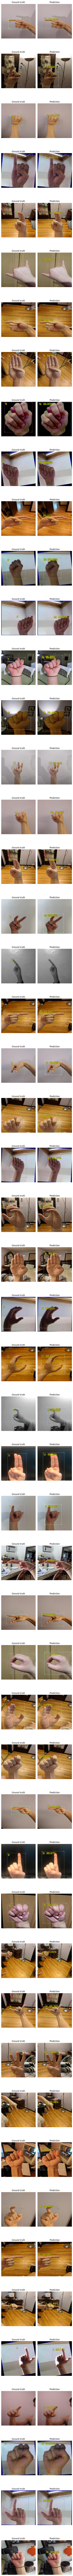

In [ ]:
show_preds(preds=preds_d2, font_size=30, label_color='#ffff00')

In [ ]:
class TestDat():
    def __init__(self, Dat1, Dat2, Dat3):
        self.Truth = Dat1
        self.Pred = Dat2
        self.Count = Dat3
  
TestArray = [] #empty array
SuccessArray = []

def FalseCount(truth, pred):
  found = False
  for t in TestArray:
    if t.Truth == truth and t.Pred == pred:
      t.Count += 1
      found = True
      break
      
  if not(found):
    new = TestDat(truth, pred, 1)
    TestArray.append(new)

def SuccessCount(truth, pred):
  found = False
  for t in SuccessArray:
    if t.Truth == truth and t.Pred == pred:
      t.Count += 1
      found = True
      break
      
  if not(found):
    new = TestDat(truth, pred, 1)
    SuccessArray.append(new)

def printDetail(Arr):
  sum = 0
  for x in Arr:
    sum += x.Count
    if x.Pred != "":
      print(x.Truth ," to ",x.Pred, " = ", x.Count)
    else:
      print(x.Truth ," to ?? = ", x.Count)
  print("Total = ", sum)

def check(preds):
  TP = 0
  TN = 0
  for p in preds:
    lns = len(p.pred.detection.labels)
    if (lns>0):
      print("printnya = ", p.pred)
      print(p.pred.common.record_id)
      if (p.pred.detection.labels[0] == p.ground_truth.detection.labels[0]):
          TP+=1
          SuccessCount(p.ground_truth.detection.labels[0], p.pred.detection.labels[0])
      else:
        TN += 1
        FalseCount(p.ground_truth.detection.labels[0], p.pred.detection.labels[0])
    else:
      TN+= 1
      FalseCount( p.ground_truth.detection.labels[0], None)
  return (TP,TN, len(preds))


In [ ]:
TP = 0 # truth positive
TN = 0 # truth negative 

pos, neg, lens = check(preds_d1)
pos2, neg2, lens2 = check(preds_d2)

TP = pos+pos2
TN = neg+neg2

len_pred = lens+lens2

printnya =  BaseRecord

common: 
	- Img: 384x384x3 <np.ndarray> Image
	- Record ID: R15_jpg.rf.4255d2ace2d4d9ae6b733ed479a5790e
	- Image size ImgSize(width=384, height=384)
detection: 
	- Scores: [      0.985]
	- Class Map: <ClassMap: {'background': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}>
	- Labels: [18]
	- BBoxes: [<BBox (xmin:115.42222595214844, ymin:72.87611389160156, xmax:303.186279296875, ymax:339.84197998046875)>]
R15_jpg.rf.4255d2ace2d4d9ae6b733ed479a5790e
printnya =  BaseRecord

common: 
	- Record ID: Q2215_jpg.rf.2108de1a8f5069693cb6bbe5590005ae
	- Img: 384x384x3 <np.ndarray> Image
	- Image size ImgSize(width=384, height=384)
detection: 
	- Scores: [    0.59072      0.5539]
	- Class Map: <ClassMap: {'background': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J':

In [ ]:
print(len(preds_d1))
print(len(preds_d2))

208
52


In [ ]:
elapsed = end_time-start_time
str_time = time.strftime("%H:%M:%S", time.gmtime(elapsed))


print("Model name = ", model_name)
print("TP = ", TP ," / ",len_pred," = ",TP/len_pred)
print("TN = ", TN)

print("Duration = ", print(str_time))
print ("FPS = ", len_pred,"/", int(elapsed)," = ", (len_pred/int(elapsed)) )


print("\n Detail True Positive")
printDetail(SuccessArray)

print("\n Detail True Negative")
printDetail(TestArray)

Model name =  torchvision.faster_rcnn|resnet_fpn_configs.resnet18_fpn|12-01-2022|04-59-28|e50-t|lr-1e-4.pth
TP =  221  /  260  =  0.85
TN =  39
00:05:19
Duration =  None
FPS =  260 / 319  =  0.8150470219435737

 Detail True Positive
R  to  R  =  9
Q  to  Q  =  7
H  to  H  =  10
L  to  L  =  9
O  to  O  =  8
X  to  X  =  8
N  to  N  =  9
Z  to  Z  =  8
J  to  J  =  10
Y  to  Y  =  7
G  to  G  =  10
V  to  V  =  9
K  to  K  =  10
W  to  W  =  10
S  to  S  =  9
P  to  P  =  8
T  to  T  =  8
A  to  A  =  5
F  to  F  =  10
C  to  C  =  9
D  to  D  =  8
B  to  B  =  10
M  to  M  =  7
I  to  I  =  8
E  to  E  =  6
U  to  U  =  9
Total =  221

 Detail True Negative
D  to  K  =  1
R  to  D  =  1
U  to  K  =  1
E  to  M  =  4
P  to  None  =  1
T  to  A  =  1
Q  to  J  =  3
M  to  N  =  2
S  to  N  =  1
M  to  J  =  1
D  to  J  =  1
O  to  A  =  2
I  to  D  =  2
P  to  J  =  1
Y  to  I  =  2
V  to  K  =  1
Z  to  J  =  1
A  to  Y  =  1
C  to  P  =  1
N  to  S  =  1
A  to  T  =  1
X  to  D  =  1
X

In [ ]:
import csv

header = ["record id",'Actual Value', 'Predicted Value', 'Treshold']

# 
# preds_d2
# p.pred.detection.labels[0] == p.ground_truth.detection.labels[0]
def to_tuple(p):
  if len(p.pred.detection.labels)>0:
    return (p.pred.common.record_id, p.ground_truth.detection.labels[0], p.pred.detection.labels[0], p.pred.detection.scores[0])
  else:
    return (p.pred.common.record_id, p.ground_truth.detection.labels[0], "-", 0)

def write_csv(preds):
  for p in preds:
        row = to_tuple(p)
        writer.writerow(row)

with open(model_name+".csv", "w") as stream:
    writer = csv.writer(stream)
    writer.writerow(header)
    write_csv(preds_d1)
    write_csv(preds_d2)


# with open('resnet50.csv', 'w', encoding='UTF8', newline='') as f:
#     writer = csv.writer(f)

#     # write the header
#     writer.writerow(header)

#     # write the data
#     writer.writerow(data)

# Hasil Pengujian

## Dataset David Lee `valid +test`
### Resnet 18

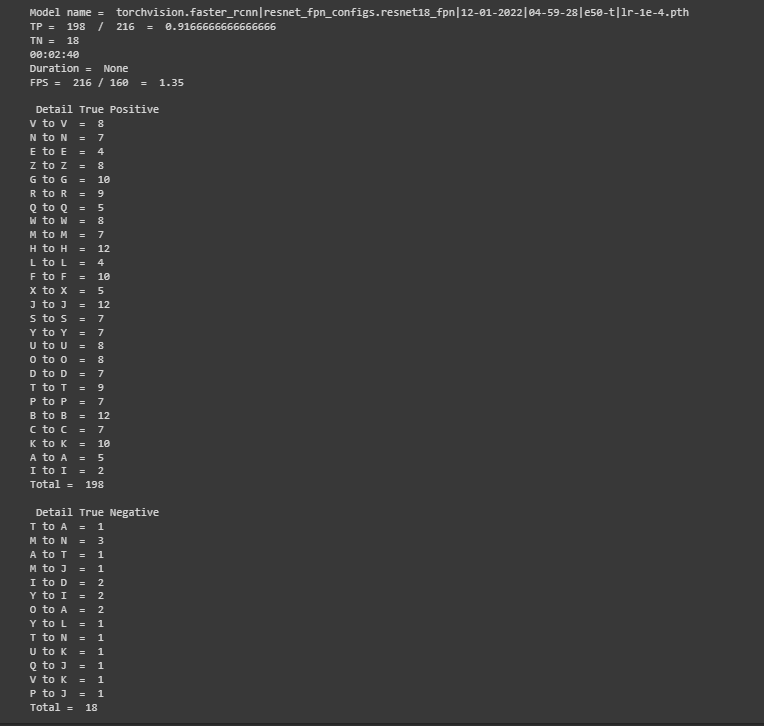

### ResNet 50


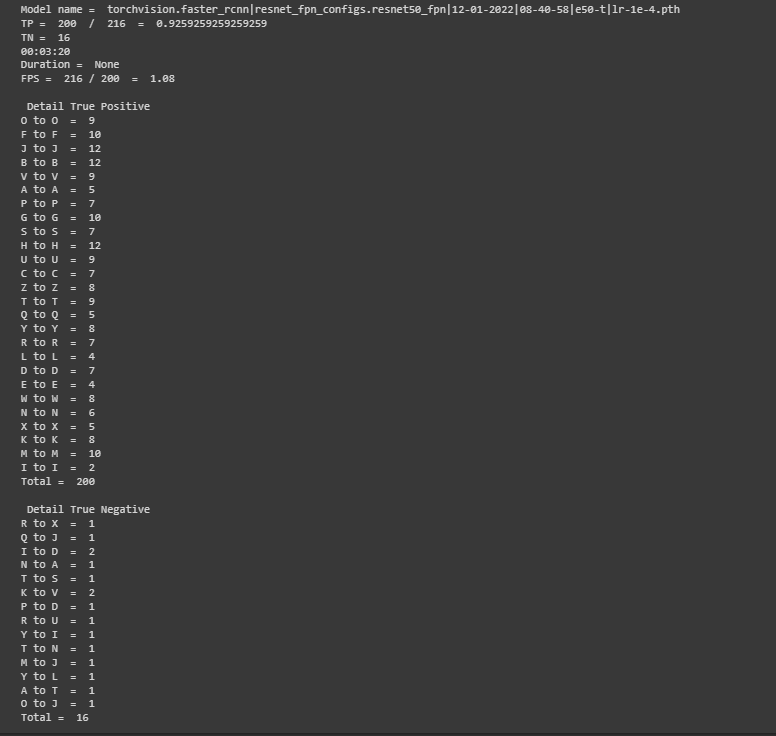


# hasil pengujian dengan dataset jumlah sama

## ResNet-18

```
Model name =  torchvision.faster_rcnn|resnet_fpn_configs.resnet18_fpn|12-01-2022|04-59-28|e50-t|lr-1e-4.pth
TP =  220  /  260  =  0.8461538461538461
TN =  40
00:04:54
Duration =  None
FPS =  260 / 294  =  0.8843537414965986

 Detail True Positive
J  to  J  =  10
N  to  N  =  9
Q  to  Q  =  7
B  to  B  =  10
P  to  P  =  8
W  to  W  =  10
Y  to  Y  =  7
K  to  K  =  10
C  to  C  =  9
R  to  R  =  9
G  to  G  =  10
U  to  U  =  9
I  to  I  =  8
T  to  T  =  8
S  to  S  =  9
V  to  V  =  9
D  to  D  =  8
H  to  H  =  10
Z  to  Z  =  8
F  to  F  =  10
L  to  L  =  9
M  to  M  =  7
O  to  O  =  8
A  to  A  =  5
X  to  X  =  8
E  to  E  =  5
Total =  220

 Detail True Negative
Y  to  I  =  2
A  to  T  =  1
Q  to  J  =  3
M  to  N  =  2
M  to  J  =  1
E  to  M  =  5
T  to  N  =  1
A  to  Y  =  1
R  to  D  =  1
P  to  J  =  1
V  to  K  =  1
A  to  M  =  3
C  to  P  =  1
Z  to  None  =  1
X  to  D  =  1
D  to  K  =  1
S  to  N  =  1
O  to  A  =  2
T  to  A  =  1
N  to  S  =  1
I  to  D  =  2
P  to  None  =  1
Z  to  J  =  1
L  to  I  =  1
U  to  K  =  1
Y  to  L  =  1
X  to  Z  =  1
D  to  J  =  1
Total =  40
```

## ResNet 50
```
Model name =  torchvision.faster_rcnn|resnet_fpn_configs.resnet50_fpn|12-01-2022|08-40-58|e50-t|lr-1e-4.pth
TP =  233  /  260  =  0.8961538461538462
TN =  27
00:06:00
Duration =  None
FPS =  260 / 360  =  0.7222222222222222

 Detail True Positive
U  to  U  =  10
E  to  E  =  8
B  to  B  =  10
S  to  S  =  10
M  to  M  =  9
P  to  P  =  8
F  to  F  =  10
Z  to  Z  =  10
X  to  X  =  8
T  to  T  =  8
D  to  D  =  9
N  to  N  =  8
C  to  C  =  9
G  to  G  =  10
V  to  V  =  10
O  to  O  =  9
H  to  H  =  10
J  to  J  =  10
I  to  I  =  8
L  to  L  =  9
Q  to  Q  =  7
K  to  K  =  8
A  to  A  =  8
W  to  W  =  10
R  to  R  =  9
Y  to  Y  =  8
Total =  233

 Detail True Negative
T  to  S  =  1
Y  to  L  =  1
I  to  D  =  2
N  to  A  =  1
Q  to  J  =  1
A  to  S  =  1
C  to  Q  =  1
P  to  None  =  1
N  to  E  =  1
X  to  Z  =  1
O  to  J  =  1
K  to  V  =  2
A  to  T  =  1
T  to  N  =  1
L  to  None  =  1
M  to  J  =  1
Q  to  None  =  1
R  to  X  =  1
X  to  K  =  1
Y  to  I  =  1
Q  to  O  =  1
P  to  D  =  1
D  to  None  =  1
E  to  O  =  1
E  to  B  =  1
Total =  27
```

In [ ]:
obj = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for o in obj[]:
  print(o)


In [ ]:

def run(pred, char):
  for p in pred:
    if p.ground_truth.detection.labels[0] == char:
      show_preds(preds=[p] , font_size=30, label_color='#ffff00')

def ex(pred, pred2, char):
  run(pred,char)
  run(pred2, char)

obj = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for o in obj:
  # print(o)
  ex(preds_d1, preds_d2, o)


